In [44]:
#ref: https://www.youtube.com/watch?v=wQ8BIBpya2k
import tensorflow as tf
#using data called mnist
mnist=tf.keras.datasets.mnist #28*28 images of hand written digits 0-9

(x_train,y_train),(x_test,y_test)=mnist.load_data()

#scale or normalize the data
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [45]:
#Architechture of model
#bulding the model, feed forward model(sequentail model)
model=tf.keras.models.Sequential()

#first layer
model.add(tf.keras.layers.Flatten()) 
#to flatten the dense network of nn, generally used in cnn, but here using for input layer

#now hidden layers
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) 
#dense used for nn, 128 is for number of nodes in first  hidden layer
#relu activation function to fire the neuron

#second layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) 

#third layer, output layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
#softmax for probabilty distribution

In [46]:
#training data set
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
#optimizer, most critical part nn, in keras approx 10 types of optimizer,
#adam is default optimizer
#eg. gradient descent use stochastic gradient descent
#loss is degree of error, nn minimize the loss
#in case of cat vs dog, use binary loss

model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2616 - accuracy: 0.9226
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1048 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0726 - accuracy: 0.9766


In [47]:
#calculate the validation loss
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

#validation loss should be slightly greater than epoch last value in model fit 
#valicatoin accuracy should be slightly lower than epoch last value in model fit
#it should not be too close, it should not have too difference

313/313 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.9734
0.08299122750759125 0.9733999967575073


In [49]:
#save and load the model
model.save('epic_num_reader')
new_model=tf.keras.models.load_model('epic_num_reader')

INFO:tensorflow:Assets written to: epic_num_reader\assets


In [50]:
#predictions
predictions=new_model.predict([x_test])
print(predictions)

[[2.01527346e-08 3.84228862e-08 2.51713482e-06 ... 9.99957085e-01
  3.46368552e-08 6.61732770e-07]
 [9.37091862e-11 2.78860571e-05 9.99968648e-01 ... 8.32493883e-12
  2.03033217e-08 4.90565227e-12]
 [3.51609089e-07 9.99819338e-01 4.40275971e-06 ... 4.51495252e-05
  1.07354084e-04 1.43907442e-07]
 ...
 [4.96198534e-11 3.98949425e-07 1.95457837e-08 ... 6.32165938e-06
  5.76378284e-07 6.84212000e-06]
 [2.68227240e-07 1.12182770e-05 2.89691848e-09 ... 5.46437775e-07
  4.26187441e-02 1.38827225e-08]
 [4.40336763e-08 1.49103236e-08 2.76159909e-07 ... 1.85149084e-11
  4.97151511e-08 6.62873359e-12]]


In [48]:
#how data looks like
#import matplotlib.pyplot as plt
#plt.imshow(x_train[0])
#print(x_train[0])

7


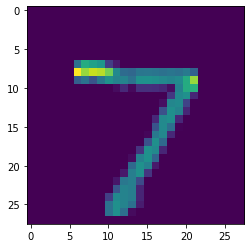

In [57]:
#now lets see first predicted value 
import numpy as np
print(np.argmax(predictions[0]))
plt.imshow(x_test[0])
plt.show()